In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup
import urllib

In [3]:
import pandas as pd
import numpy as np

In [20]:
import pandas as pd
from pandas import DataFrame
import argparse
import quandl
import pandas_datareader as web
from time import sleep
import datetime as dt
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def get_sp500_data(start=dt.datetime.strptime("1997-01-01", "%Y-%m-%d"),
                   end=dt.datetime.now(), use_quandl=True, adjust=True, inner=True,
                   sleeptime=2, verbose=True):
    """Fetches S&P 500 data
     
    args:
        start: datetime; The earliest possible date
        end: datetime; The last possible date
        use_quandl: bool; Whether to fetch data from Quandl (reverts to Google if False)
        adjust: bool; Whether to use adjusted close (only works with Quandl)
        inner: bool; Whether to use an inner join or outer join when combining series (inner has no missing data)
        sleeptime: int; How long to sleep between fetches
        verbose: bool; Whether to print a log while fetching data
     
    return:
        DataFrame: Contains stock price data
    """
     
    join = "outer"
    if inner:
        join = "inner"
     
    symbols_table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies",
                                 header=0)[0]
    symbols = list(symbols_table.loc[:, "Ticker symbol"])
 
    sp500 = None
    for s in symbols:
        sleep(sleeptime)
        if verbose:
            print("Processing: " + s + "...", end='')
        try:
            if use_quandl:
                s_data = quandl.get("WIKI/" + s, start_date=start, end_date=end)
                if adjust:
                    s_data = s_data.loc[:, "Adj. Close"]
                else:
                    s_data = s_data.loc[:, "Close"]
            else:
                s_data = web.DataReader(s, "google", start, end).loc[:, "Close"]
            s_data.name = s
            s_data.dropna()
            if s_data.shape[0] > 1:
                if sp500 is None:
                    sp500 = DataFrame(s_data)
                else:
                    sp500 = sp500.join(s_data, how=join)
                if verbose:
                    print(" Got it! From", s_data.index[0], "to", s_data.index[-1])
            else:
                if verbose:
                    print(" Sorry, but not this one!")
        except Exception:
            if verbose:
                print(" Sorry, but not this one!")
 
    badsymbols = list(set(s) - set(sp500.columns))
    if verbose and len(badsymbols) > 0:
        print("There were", len(badsymbols), "symbols for which data could not be obtained.")
        print("They are:", ", ".join(badsymbols))
     
    return sp500

In [6]:
import pandas as pd
from pandas_datareader import data as wb

ticker='BTC-USD'

ticker=wb.DataReader(ticker,start='2015-1-1',data_source='yahoo')
# print(ticker)

In [7]:
type(ticker)

pandas.core.frame.DataFrame

In [8]:
sp = wb.DataReader('^GSPC',start='2015-1-1',data_source='yahoo')

In [9]:
print(sp)

                   High          Low         Open        Close      Volume  \
Date                                                                         
2015-01-02  2072.360107  2046.040039  2058.899902  2058.199951  2708700000   
2015-01-05  2054.439941  2017.339966  2054.439941  2020.579956  3799120000   
2015-01-06  2030.250000  1992.439941  2022.150024  2002.609985  4460110000   
2015-01-07  2029.609985  2005.550049  2005.550049  2025.900024  3805480000   
2015-01-08  2064.080078  2030.609985  2030.609985  2062.139893  3934010000   
...                 ...          ...          ...          ...         ...   
2019-07-26  3027.979980  3012.590088  3013.250000  3025.860107  3257590000   
2019-07-29  3025.610107  3014.300049  3024.469971  3020.969971  3203710000   
2019-07-30  3017.189941  3000.939941  3007.659912  3013.179932  3634330000   
2019-07-31  3017.399902  2958.080078  3016.219971  2980.379883  4623430000   
2019-08-01  3013.590088  2945.229980  2980.320068  2953.560059  

In [10]:
type(sp)

pandas.core.frame.DataFrame

In [11]:
sp.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [12]:
sp['Date'] = sp.index

In [13]:
sp500 = sp[['Close']]

In [14]:
print(sp500),sp500.index

                  Close
Date                   
2015-01-02  2058.199951
2015-01-05  2020.579956
2015-01-06  2002.609985
2015-01-07  2025.900024
2015-01-08  2062.139893
...                 ...
2019-07-26  3025.860107
2019-07-29  3020.969971
2019-07-30  3013.179932
2019-07-31  2980.379883
2019-08-01  2953.560059

[1153 rows x 1 columns]


(None, DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
                '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
                '2015-01-14', '2015-01-15',
                ...
                '2019-07-19', '2019-07-22', '2019-07-23', '2019-07-24',
                '2019-07-25', '2019-07-26', '2019-07-29', '2019-07-30',
                '2019-07-31', '2019-08-01'],
               dtype='datetime64[ns]', name='Date', length=1153, freq=None))

In [15]:
sp500.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-07-19', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26', '2019-07-29', '2019-07-30',
               '2019-07-31', '2019-08-01'],
              dtype='datetime64[ns]', name='Date', length=1153, freq=None)

In [16]:
type(sp500),type(sp500.Close)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error as MSE

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [21]:
#Setting Graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10

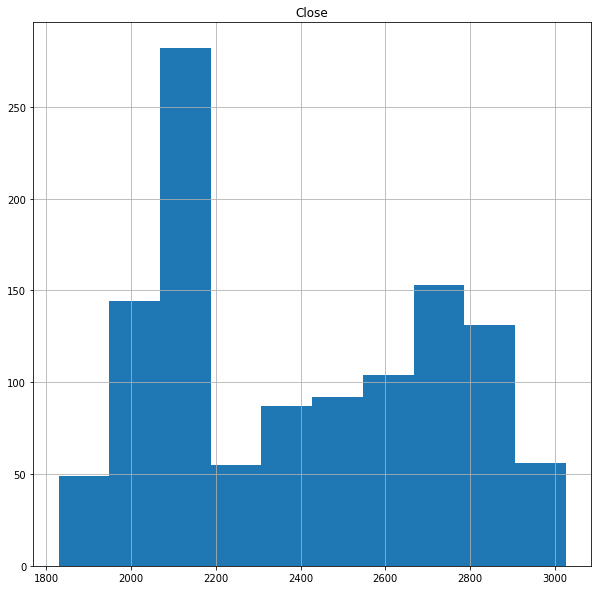

In [22]:
sp500.hist()
plt.show()

The Histogram shows us that most of the times S&P 500 close aws between 2200 - 2400. Analysing the data shows us that it recently breached the 3000 resistance due to strong growth

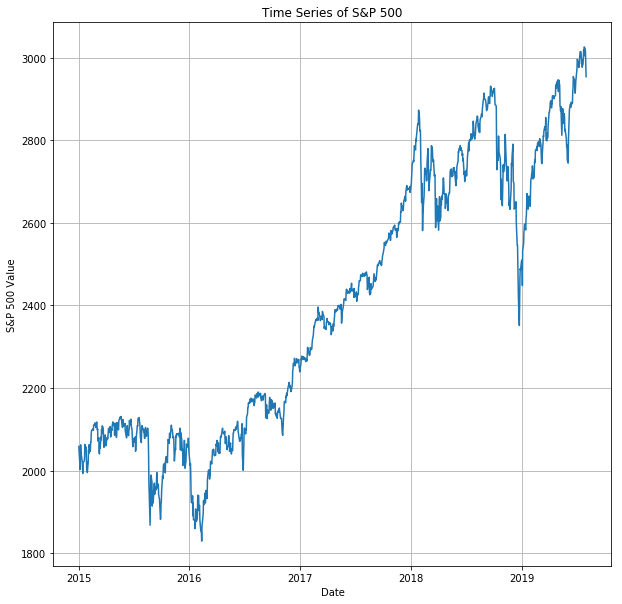

In [24]:
plt.plot(sp500['Close'])
plt.title('Time Series of S&P 500') 
plt.ylabel('S&P 500 Value')
plt.xlabel('Date')
plt.grid()
plt.show()

 The index dropped significantly during 2018 end but rebounced quickly breaching the 3000 mark in recent times. 
 Also it it quite evident that the time series in non-stationary and the trent is growing upward. 
 Let's dive into checking the stationarity using the Auto-Dickey Fuller test 

### Stationarity Analysis ###

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. 

It uses an autoregressive model and optimizes an information criterion across multiple different lag values.


* __Null Hypothesis (H0)__: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* __Alternate Hypothesis (H1)__: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


In [25]:
df_test = adfuller(sp500['Close'], autolag='AIC')
result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)


Test Statistic                   -0.623518
p-value                           0.865579
#Lags Used                        0.000000
Number of Observations Used    1152.000000
Critical Value (1%)              -3.436039
Critical Value (5%)              -2.864052
Critical Value (10%)             -2.568108
dtype: float64


Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

Calculating the Rolling mean of the time series to introduce stationarity

In [34]:
rolling_mean = pd.Series.rolling(sp500['Close'],window= 15,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size

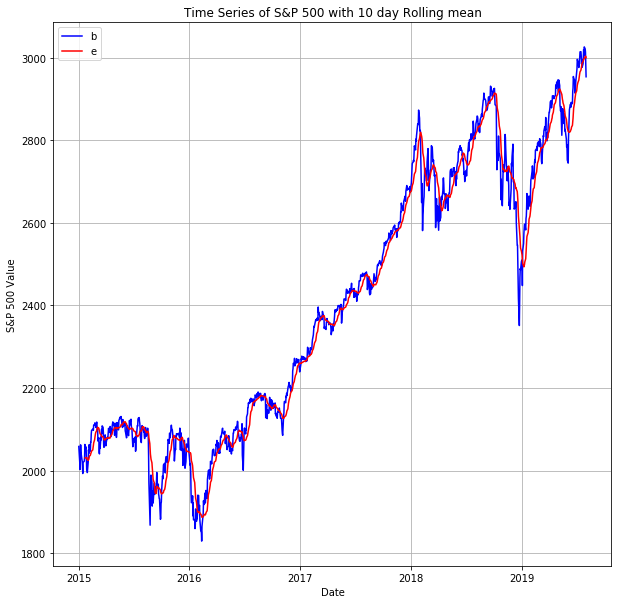

In [35]:
plt.plot(sp500, color = 'blue', label = 'Normal')
plt.plot(rolling_mean, color = 'red', label = 'Rolling')
plt.legend('best')
plt.title('Time Series of S&P 500 with 10 day Rolling mean') 
plt.ylabel('S&P 500 Value')
plt.xlabel('Date')
plt.grid()
plt.show()


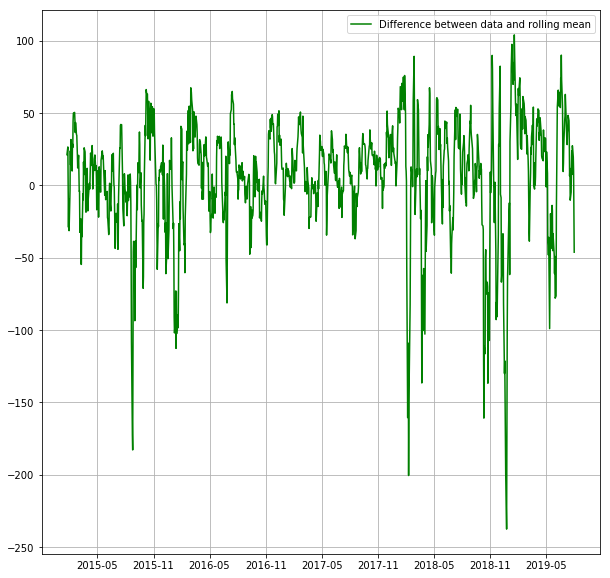

In [38]:
#Subtracting Rolling mean from the original series


rolling_mean_diff = sp500['Close'] - rolling_mean
#plt.rcParams["figure.figsize"] = fig_size
# plt.plot(sp500, color = 'blue', label = 'Normal')
# plt.plot(rolling_mean, color = 'red', label = 'Rolling')
plt.plot(rolling_mean_diff, color='green',label='Difference between data and rolling mean')
plt.legend(loc='best')
plt.grid()
plt.show()
rolling_mean_diff.dropna(inplace=True)



In [42]:
rolling_mean_diff.head()

Date
2015-01-23    21.251400
2015-01-26    26.595410
2015-01-27    -1.542635
2015-01-28   -28.902653
2015-01-29    -9.502686
Name: Close, dtype: float64

In [43]:
#Checking the stationarity of the differenced series

df_rmean_test = adfuller(rolling_mean_diff, autolag='AIC')
result = pd.Series(df_rmean_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)


Test Statistic                -6.937556e+00
p-value                        1.045144e-09
#Lags Used                     1.800000e+01
Number of Observations Used    1.120000e+03
Critical Value (1%)           -3.436039e+00
Critical Value (5%)           -2.864052e+00
Critical Value (10%)          -2.568108e+00
dtype: float64


The p value is low and thus we can reject the Null Hypothesis with confidence. Also the test statistic is lower than all the critical values

Taking log transformation of the data to check stationarity

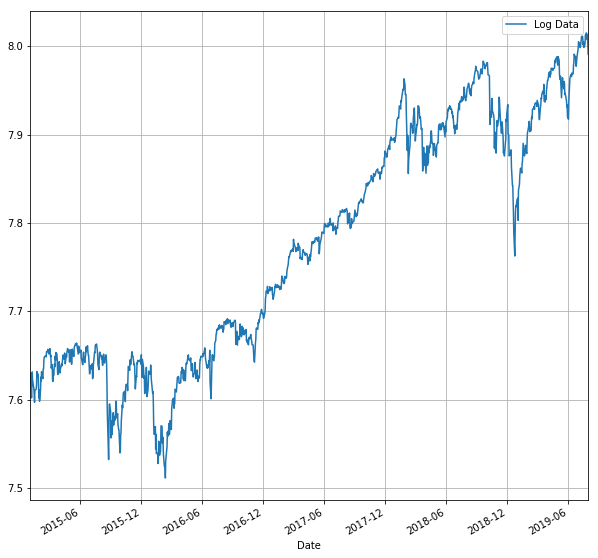

In [45]:
rate_data_log = np.log(sp500['Close'])

rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()





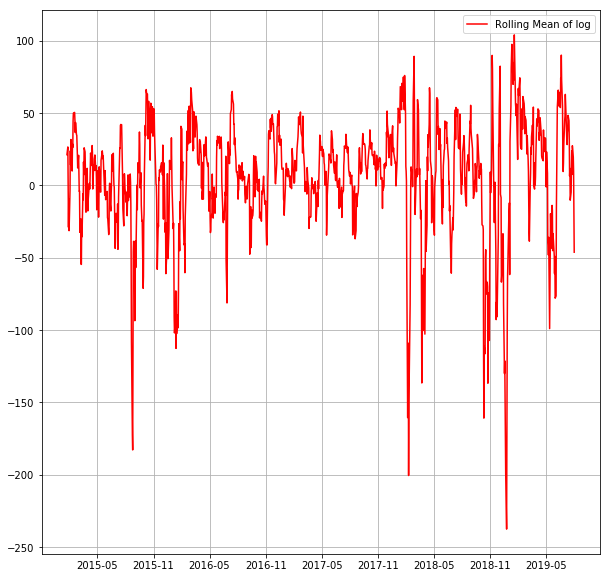

In [46]:
#ROlling mean of Log data

log_rolling_mean=pd.Series.rolling(rate_data_log,window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
log_rolmean_diff=rate_data_log-log_rolling_mean
log_rmean_diff= plt.plot(rolling_mean_diff, color='red', label='Rolling Mean of log')
plt.legend(loc='best')
plt.grid()
plt.show()
log_rolmean_diff.dropna(inplace=True)


In [47]:
df_test_log = adfuller(log_rolmean_diff, autolag='AIC')
result_log = pd.Series(df_test_log[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_log[4].items():
    result_log['Critical Value (%s)'%key] = value
print (result_log)

Test Statistic                -6.984192e+00
p-value                        8.047353e-10
#Lags Used                     1.500000e+01
Number of Observations Used    1.128000e+03
Critical Value (1%)           -3.436160e+00
Critical Value (5%)           -2.864106e+00
Critical Value (10%)          -2.568136e+00
dtype: float64


#### Exponentially weighed moving Average smoothning

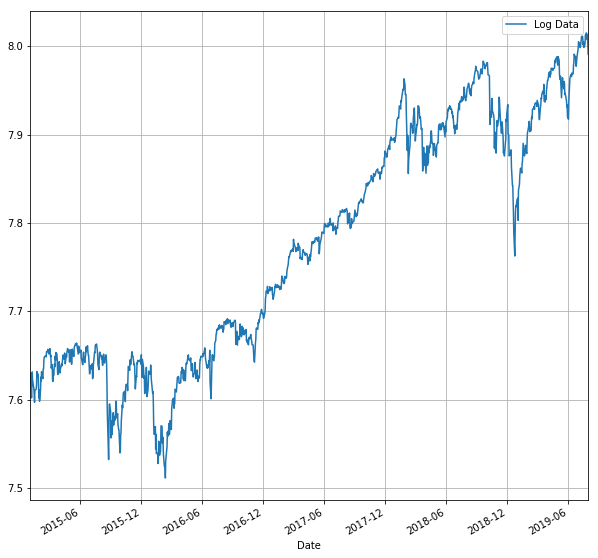

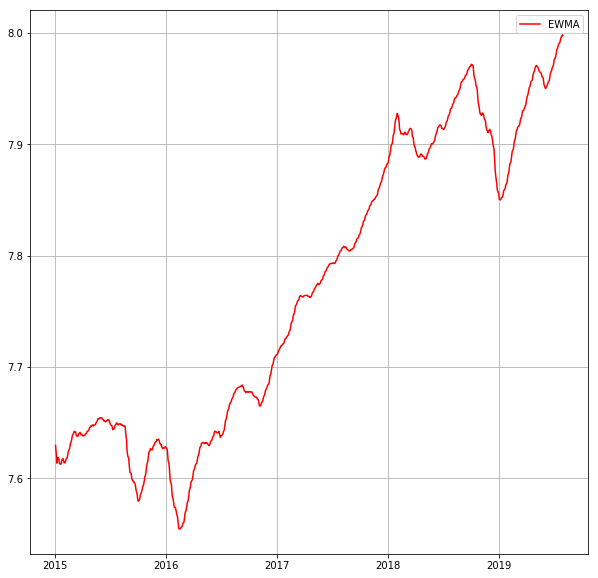

In [48]:
ewma_data=pd.Series.ewm(rate_data_log,halflife=10,min_periods=0,adjust=True,ignore_na=False).mean()

rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

# Calculate EWMA and plot
plt.plot(ewma_data, color='red',label='EWMA')
plt.legend()
plt.legend(loc='best')
plt.grid()
plt.show()

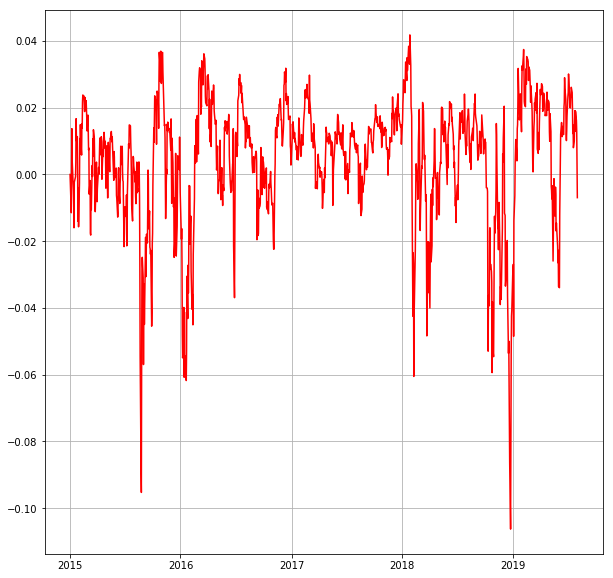

In [49]:
# Calculate and plot difference

ewma_diff=rate_data_log-ewma_data
plt.rcParams["figure.figsize"] = fig_size
plt.plot(ewma_diff, color='red')
plt.grid()
plt.show()



In [50]:
df_test_ewma = adfuller(ewma_diff, autolag='AIC')
result_ewma = pd.Series(df_test_ewma[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_ewma[4].items():
    result_ewma['Critical Value (%s)'%key] = value
print (result_ewma)

Test Statistic                -7.509052e+00
p-value                        4.061227e-11
#Lags Used                     0.000000e+00
Number of Observations Used    1.152000e+03
Critical Value (1%)           -3.436039e+00
Critical Value (5%)           -2.864052e+00
Critical Value (10%)          -2.568108e+00
dtype: float64


### First Order Differencing

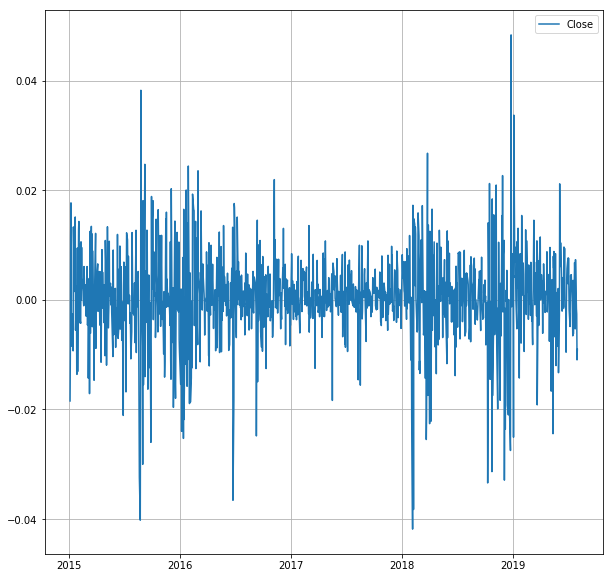

In [51]:
rate_log_diff = rate_data_log - rate_data_log.shift()
rate_log_diff.dropna(inplace=True)
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_log_diff)
plt.legend('Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

In [52]:
df_test_logdiff = adfuller(rate_log_diff, autolag='AIC')
result_logdiff = pd.Series(df_test_logdiff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_logdiff[4].items():
    result_logdiff['Critical Value (%s)'%key] = value
print (result_logdiff)

Test Statistic                  -25.396430
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1150.000000
Critical Value (1%)              -3.436049
Critical Value (5%)              -2.864057
Critical Value (10%)             -2.568110
dtype: float64


The p-value is close to 0 which means we can reject the Null Hypothesis with confidence. 

So far this has been ther best transformation 

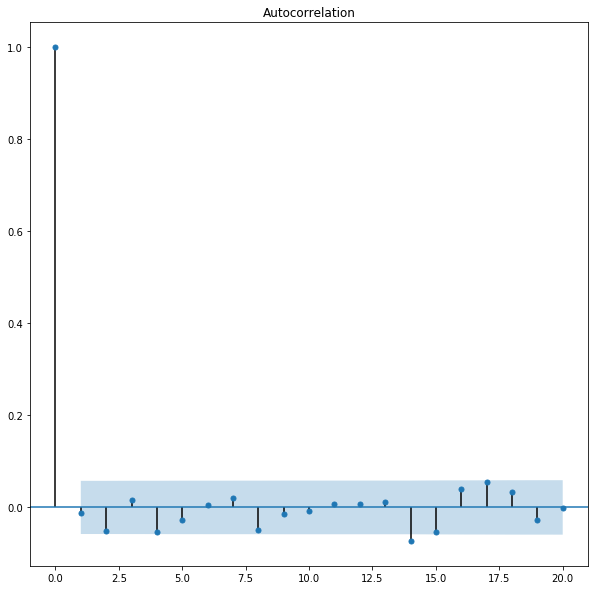

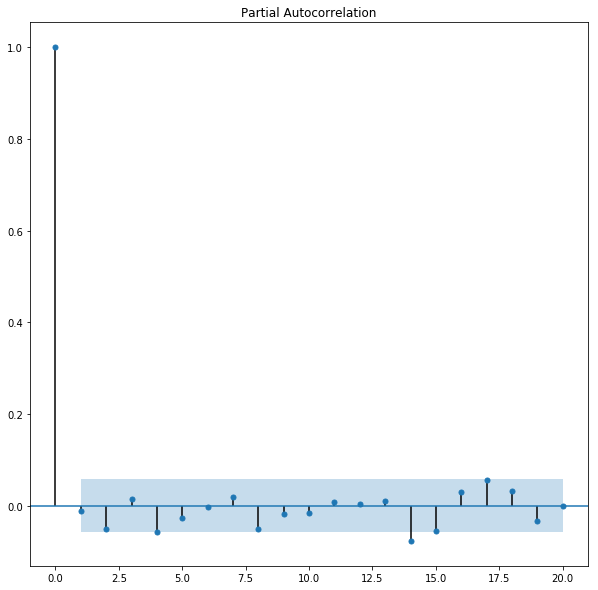

In [53]:
plot_acf(rate_log_diff,lags=20)
plt.show()

plot_pacf(rate_log_diff,lags=20)
plt.show()



### Training a ARIMA model on the differenced and log data

In [54]:
rate_data_log

Date
2015-01-02    7.629587
2015-01-05    7.611140
2015-01-06    7.602207
2015-01-07    7.613769
2015-01-08    7.631500
                ...   
2019-07-26    8.014951
2019-07-29    8.013333
2019-07-30    8.010751
2019-07-31    7.999806
2019-08-01    7.990767
Name: Close, Length: 1153, dtype: float64

In [64]:
data1 = rate_data_log.values
train = list(data1[0:1000])
train_ = list(data1[0:1000])
test = list(data1[1000:])
otest = list(data1[1000:0])

train_list = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(np.array(train),order=(1,0,1))
    fit = model.fit()
    forecast = float(fit.forecast()[0])
    predictions.append(forecast)
    train.append(float(test[t]))

In [65]:
model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
full_predictions=list(fit.forecast(34)[0])


/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. I

Mean squared error: 570.522110


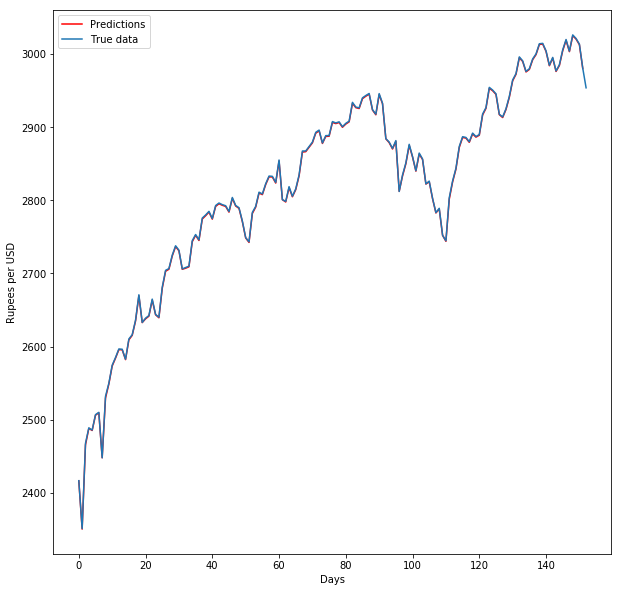

In [66]:
plt.plot(np.exp(predictions)[1:],color = 'red',label='Predictions')
plt.plot(np.exp(test),label='True data')
#plt.plot(np.exp(full_predictions),label='Full prediction')
plt.ylabel('Rupees per USD')
plt.xlabel('Days')
plt.legend()
plt.plot()

print ('Mean squared error: {0:3f}'.format(MSE(np.exp(test),np.exp(predictions))))
